In [1]:
# %%
from pyspark.sql import SparkSession
from pyspark.sql import functions as F


In [2]:
spark = (SparkSession.builder.appName("NBA_Shot_Analysis").getOrCreate())
# sc = spark.sparkContext

## Read .csv files

In [3]:
df = spark.read.csv("NBA shot log 16-17-regular season/Shot data/*.csv", header=True, inferSchema=True)
players_df = spark.read.csv("NBA shot log 16-17-regular season/Player Regular 16-17 Stats.csv", header=True,
                            inferSchema=True)

## Display schema of DataFrames.

In [4]:
# analyze data
df.printSchema()

root
 |-- self previous shot: string (nullable = true)
 |-- player position: string (nullable = true)
 |-- home game: string (nullable = true)
 |-- location x: integer (nullable = true)
 |-- opponent previous shot: string (nullable = true)
 |-- home team: string (nullable = true)
 |-- shot type: string (nullable = true)
 |-- points: integer (nullable = true)
 |-- away team: string (nullable = true)
 |-- location y: integer (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- date: date (nullable = true)
 |-- shoot player: string (nullable = true)
 |-- time from last shot: integer (nullable = true)
 |-- quarter: integer (nullable = true)
 |-- current shot outcome: string (nullable = true)



In [5]:
players_df.printSchema()

root
 |-- Date/Time of Update: 2017-05-09 4:34:01 PM: string (nullable = true)
 |-- Player ID: integer (nullable = true)
 |-- LastName: string (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- Jersey Num: integer (nullable = true)
 |-- Position: string (nullable = true)
 |-- Height: string (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- Birth Date: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Birth City: string (nullable = true)
 |-- Birth Country: string (nullable = true)
 |-- Rookie: string (nullable = true)
 |-- Team ID: integer (nullable = true)
 |-- Team Abbr: string (nullable = true)
 |-- Team City: string (nullable = true)
 |-- Team Name: string (nullable = true)
 |-- GamesPlayed: integer (nullable = true)
 |-- Fg2PtAtt: integer (nullable = true)
 |-- Fg2PtMade: integer (nullable = true)
 |-- Fg3PtAtt: integer (nullable = true)
 |-- Fg3PtMade: integer (nullable = true)
 |-- FtAtt: integer (nullable = true)
 |-- FtMade: integer (nu

In [6]:
df.show()

+------------------+---------------+---------+----------+----------------------+---------+--------------------+------+---------+----------+-------------------+----------+--------------------+-------------------+-------+--------------------+
|self previous shot|player position|home game|location x|opponent previous shot|home team|           shot type|points|away team|location y|               time|      date|        shoot player|time from last shot|quarter|current shot outcome|
+------------------+---------------+---------+----------+----------------------+---------+--------------------+------+---------+----------+-------------------+----------+--------------------+-------------------+-------+--------------------+
|              NULL|             SG|       No|       711|                  NULL|      TOR|           Jump Shot|     2|      DET|       267|2024-05-06 00:15:00|2016-10-26|Kentavious Caldwe...|               NULL|      1|              SCORED|
|            SCORED|             SF|

In [7]:
players_df.show()

+------------------------------------------+---------+-------------+---------+----------+--------+------+------+----------+---+-----------------+-------------+------+-------+---------+-------------+-------------+-----------+--------+---------+--------+---------+-----+------+
|Date/Time of Update: 2017-05-09 4:34:01 PM|Player ID|     LastName|FirstName|Jersey Num|Position|Height|Weight|Birth Date|Age|       Birth City|Birth Country|Rookie|Team ID|Team Abbr|    Team City|    Team Name|GamesPlayed|Fg2PtAtt|Fg2PtMade|Fg3PtAtt|Fg3PtMade|FtAtt|FtMade|
+------------------------------------------+---------+-------------+---------+----------+--------+------+------+----------+---+-----------------+-------------+------+-------+---------+-------------+-------------+-----------+--------+---------+--------+---------+-----+------+
|                                      NULL|    10138|      Abrines|     Alex|         8|       F| 6'6""|   190|  8/1/1993| 23|Palma de Mallorca|        Spain|     Y|     9

## Data Cleaning

In [8]:
players_df = players_df.withColumn("Name", F.concat_ws(" ", players_df.FirstName, players_df.LastName))

In [9]:
df = df.drop('date', 'home game', 'home team', 'away team', 'FtMade',
             'self previous shot', 'opponent previous shot', 'time from last shot'
             , 'quarter', 'shot type', 'time')

In [10]:
players_df = players_df.drop("Date/Time of Update: 2017-05-09 4:34:01 PM", "Player ID",
                             "Jersey Num", "Birth Date", "Birth City", "Birth Country",
                             "Team ID", "Team Abbr", "Team City", "Team Name", "FirstName",
                             "LastName", "Position", "FtAtt", "FtMade")

players_df.show()

+------+------+---+------+-----------+--------+---------+--------+---------+--------------------+
|Height|Weight|Age|Rookie|GamesPlayed|Fg2PtAtt|Fg2PtMade|Fg3PtAtt|Fg3PtMade|                Name|
+------+------+---+------+-----------+--------+---------+--------+---------+--------------------+
| 6'6""|   190| 23|     Y|         73|      94|       40|     247|       94|        Alex Abrines|
| 6'7""|   240| 26|     N|         46|      80|       33|      90|       37|          Quincy Acy|
| 7'0""|   255| 23|     N|         81|     652|      374|       2|        0|        Steven Adams|
| 6'5""|   215| 31|     N|         71|     269|      123|     151|       62|       Arron Afflalo|
| 7'2""|   248| 29|     N|         55|     174|       89|       4|        0|       Alexis Ajinca|
|6'11""|   245| 28|     N|         72|      86|       45|       0|        0|        Cole Aldrich|
|6'11""|   240| 31|     N|         81|     993|      477|      56|       23|   LaMarcus Aldridge|
| 6'8""|   245| 21| 

In [11]:
df.describe().show()

+-------+---------------+------------------+------------------+------------------+-------------+--------------------+
|summary|player position|        location x|            points|        location y| shoot player|current shot outcome|
+-------+---------------+------------------+------------------+------------------+-------------+--------------------+
|  count|         210072|            209675|            210072|            209675|       210072|              210072|
|   mean|           NULL| 468.5245069750805| 2.316129707909669|249.44723023727198|         NULL|                NULL|
| stddev|           NULL|345.06365363364534|0.4649653157204641|111.02319967898578|         NULL|                NULL|
|    min|              C|                 0|                 2|                 0| A.J. Hammons|             BLOCKED|
|    max|             SG|               933|                 3|               500|Zaza Pachulia|              SCORED|
+-------+---------------+------------------+------------

### Handling Missing Values

In [12]:
df.select([F.sum(F.when(df[col].isNull(), 1).otherwise(0)).alias(col) for col in df.columns]).show()

+---------------+----------+------+----------+------------+--------------------+
|player position|location x|points|location y|shoot player|current shot outcome|
+---------------+----------+------+----------+------------+--------------------+
|              0|       397|     0|       397|           0|                   0|
+---------------+----------+------+----------+------------+--------------------+



In [13]:
df = df.dropna(subset=['location x', 'location y'])

In [14]:
players_df.describe().show()

+-------+------+------------------+------------------+------+------------------+------------------+------------------+------------------+-----------------+-------------+
|summary|Height|            Weight|               Age|Rookie|       GamesPlayed|          Fg2PtAtt|         Fg2PtMade|          Fg3PtAtt|        Fg3PtMade|         Name|
+-------+------+------------------+------------------+------+------------------+------------------+------------------+------------------+-----------------+-------------+
|  count|   510|               510|               508|   517|               517|               517|               517|               517|              517|          517|
|   mean|  NULL|219.36274509803923|26.828740157480315|  NULL| 56.41586073500967|277.87620889748547|139.86847195357834|128.45261121856868|45.93617021276596|         NULL|
| stddev|  NULL|27.184080779978242|4.4014746483738465|  NULL|26.839228128882763| 276.3181519194374|142.57880356135038|146.35076591552158|55.5304388492

In [15]:
players_df = players_df.filter("Fg2PtAtt != 0 and Fg3PtAtt != 0")

In [16]:
players_df.select(
    [F.sum(F.when(players_df[col].isNull(), 1).otherwise(0)).alias(col) for col in players_df.columns]).show()

+------+------+---+------+-----------+--------+---------+--------+---------+----+
|Height|Weight|Age|Rookie|GamesPlayed|Fg2PtAtt|Fg2PtMade|Fg3PtAtt|Fg3PtMade|Name|
+------+------+---+------+-----------+--------+---------+--------+---------+----+
|     3|     3|  5|     0|          0|       0|        0|       0|        0|   0|
+------+------+---+------+-----------+--------+---------+--------+---------+----+



In [17]:
split_col = F.split(players_df['Height'], "'")
split_col2 = F.split(split_col[1], '"')
# print the split colum
players_df = players_df.withColumn('Height', split_col[0].cast("int") * 30.48 + split_col2[0].cast("int") * 2.54)

In [18]:
age_mean = players_df.select(F.mean(players_df['Age'])).collect()[0][0]
height_mean = players_df.select(F.mean(players_df['Height'])).collect()[0][0]
weight_mean = players_df.select(F.mean(players_df['Weight'])).collect()[0][0]

players_df = players_df.fillna(age_mean, subset=['Age'])
players_df = players_df.fillna(height_mean, subset=['Height'])
players_df = players_df.fillna(weight_mean, subset=['Weight'])

## Joining DataFrames

In [19]:
df = df.join(players_df, df["shoot player"] == players_df["Name"])

In [20]:
df.show()

+---------------+----------+------+----------+--------------------+--------------------+------------------+------+---+------+-----------+--------+---------+--------+---------+--------------------+
|player position|location x|points|location y|        shoot player|current shot outcome|            Height|Weight|Age|Rookie|GamesPlayed|Fg2PtAtt|Fg2PtMade|Fg3PtAtt|Fg3PtMade|                Name|
+---------------+----------+------+----------+--------------------+--------------------+------------------+------+---+------+-----------+--------+---------+--------+---------+--------------------+
|             SG|       711|     2|       267|Kentavious Caldwe...|              SCORED|195.57999999999998|   205| 24|     N|         79|     491|      217|     437|      153|Kentavious Caldwe...|
|             SF|       637|     3|       275|       Marcus Morris|              SCORED|            205.74|   235| 27|     N|         82|     650|      303|     357|      118|       Marcus Morris|
|             P

In [21]:
df = df.withColumn("Accuracy", F.when(df.points == 2, df.Fg2PtMade / df.Fg2PtAtt)
                   .otherwise(df.Fg3PtMade / df.Fg3PtAtt))
df = df.drop("Fg2PtMade", "Fg2PtAtt", "Fg3PtMade", "Fg3PtAtt")

In [22]:
df = df.drop("shoot player", "Name")
df.show()

+---------------+----------+------+----------+--------------------+------------------+------+---+------+-----------+-------------------+
|player position|location x|points|location y|current shot outcome|            Height|Weight|Age|Rookie|GamesPlayed|           Accuracy|
+---------------+----------+------+----------+--------------------+------------------+------+---+------+-----------+-------------------+
|             SG|       711|     2|       267|              SCORED|195.57999999999998|   205| 24|     N|         79| 0.4419551934826884|
|             SF|       637|     3|       275|              SCORED|            205.74|   235| 27|     N|         82|0.33053221288515405|
|             PF|       842|     2|       261|              SCORED|            205.74|   235| 24|     N|         82| 0.5367156208277704|
|              C|       887|     2|       218|              SCORED|            210.82|   279| 23|     N|         82|  0.532150776053215|
|             SF|       843|     2|      

In [23]:
# check for duplicate rows
print(df.count())
print(df.distinct().count())

df = df.dropDuplicates()

204762
192462


In [24]:
# check for unique values for all columns
for col in df.columns:
    print(col, df.select(col).distinct().count())

player position 7
location x 717
points 2
location y 489
current shot outcome 3
Height 21
Weight 86
Age 22
Rookie 2
GamesPlayed 78
Accuracy 684


## Exploratory Data Analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='current shot outcome', ylabel='count'>

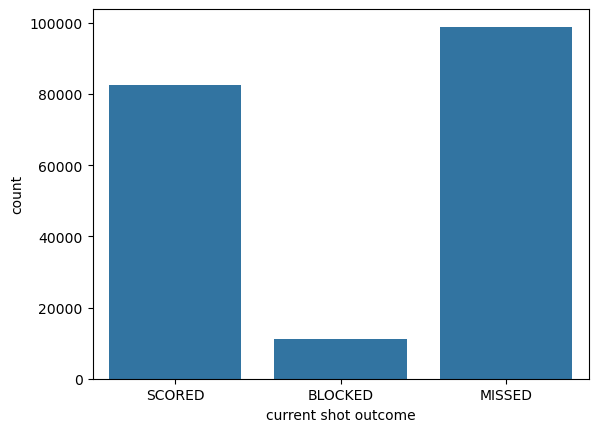

In [26]:
current_shot_outcome = df.groupBy("current shot outcome").count().toPandas()
sns.barplot(x="current shot outcome", y="count", data=current_shot_outcome)

In [27]:
# drop blocked shots
df = df.filter(df["current shot outcome"] != "BLOCKED")

<Axes: xlabel='location x', ylabel='Scored'>

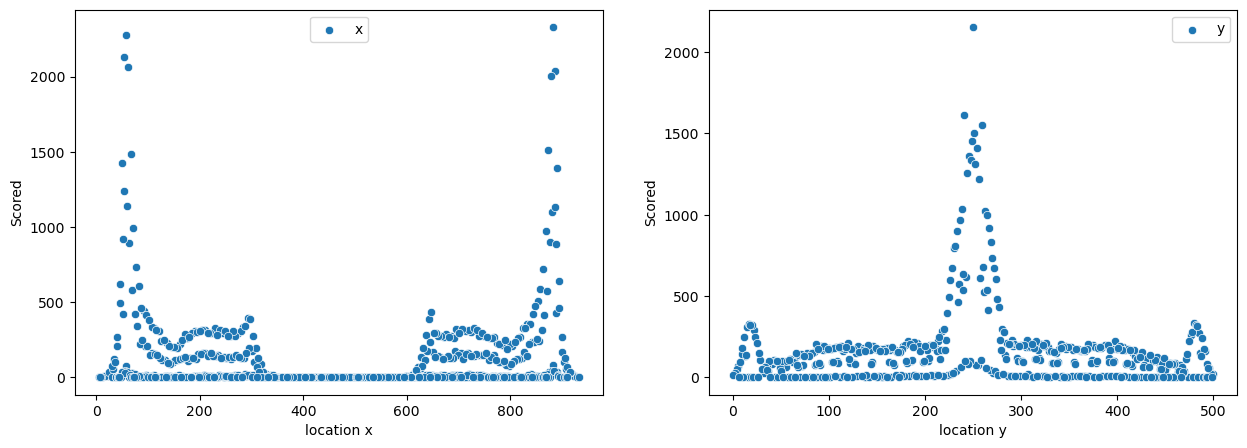

In [28]:
## plot height vs current shot outcome
shotcount_locationx = df.groupBy("location x").agg(
    F.count(F.when(df["current shot outcome"] == "SCORED", 1)).alias("Scored"),
    F.count(F.when(df["current shot outcome"] == "MISSED", 1)).alias("Missed")).toPandas()

shotcount_locationy = df.groupBy("location y").agg(
    F.count(F.when(df["current shot outcome"] == "SCORED", 1)).alias("Scored"),
    F.count(F.when(df["current shot outcome"] == "MISSED", 1)).alias("Missed")).toPandas()

# plot location x and y vs current shot outcome on same plot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x="location y", y="Scored", data=shotcount_locationy, label="y", ax=axs[1])
sns.scatterplot(x="location x", y="Scored", data=shotcount_locationx, label="x", ax=axs[0])

<Axes: xlabel='location x', ylabel='Missed'>

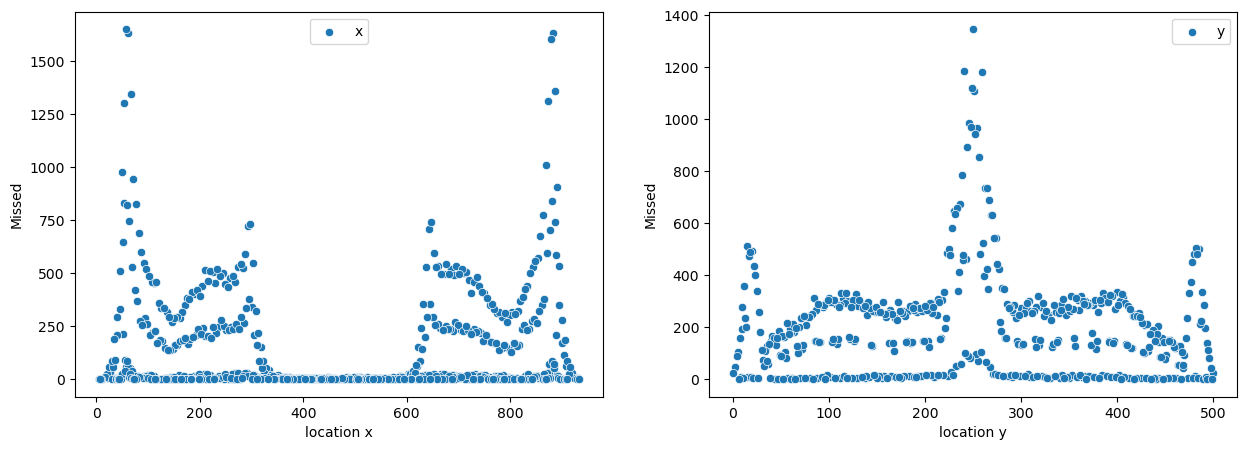

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x="location y", y="Missed", data=shotcount_locationy, label="y", ax=axs[1])
sns.scatterplot(x="location x", y="Missed", data=shotcount_locationx, label="x", ax=axs[0])

In [30]:
# get x to the nearest basket
max_x = df.agg(F.max(df["location x"])).collect()[0][0]
df = df.withColumn("location x",
                   F.when(df["location x"] > max_x / 2, max_x - df["location x"]).otherwise(df["location x"]))

<Axes: xlabel='player position', ylabel='Count'>

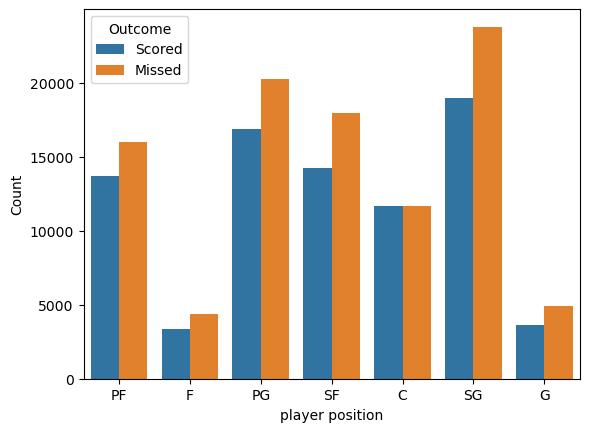

In [31]:
playerposition = df.groupBy("player position").agg(
    F.count(F.when(df["current shot outcome"] == "SCORED", 1)).alias("Scored"),
    F.count(F.when(df["current shot outcome"] == "MISSED", 1)).alias("Missed")).toPandas()

playerposition_melted = playerposition.melt(id_vars=["player position"], value_vars=["Scored", "Missed"],
                                            var_name="Outcome", value_name="Count")

sns.barplot(x="player position", y="Count", hue="Outcome", data=playerposition_melted)


<Axes: xlabel='player position', ylabel='Accuracy'>

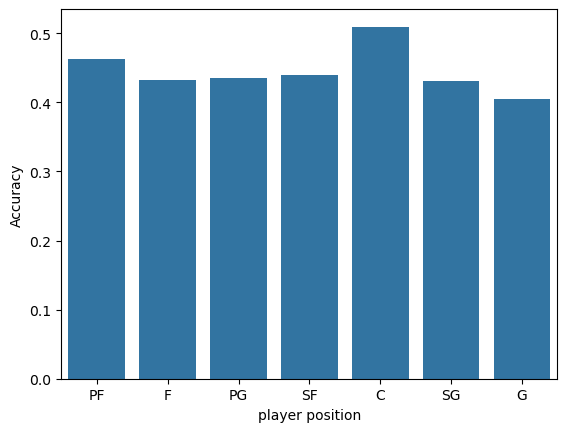

In [32]:
position = df.groupBy("player position").agg(F.mean("Accuracy").alias("Accuracy")).toPandas()

sns.barplot(x="player position", y="Accuracy", data=position)

<Axes: xlabel='points', ylabel='Count'>

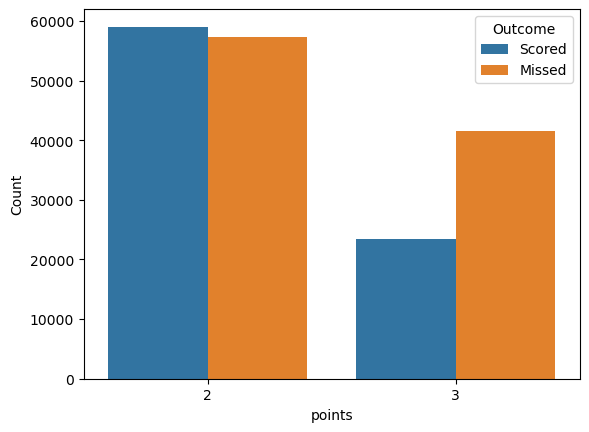

In [33]:
points = df.groupBy("points").agg(F.count(F.when(df["current shot outcome"] == "SCORED", 1)).alias("Scored"),
                                  F.count(F.when(df["current shot outcome"] == "MISSED", 1)).alias("Missed")).toPandas()

points_melted = points.melt(id_vars=["points"], value_vars=["Scored", "Missed"], var_name="Outcome", value_name="Count")

sns.barplot(x="points", y="Count", hue="Outcome", data=points_melted)

<Axes: xlabel='Rookie', ylabel='Count'>

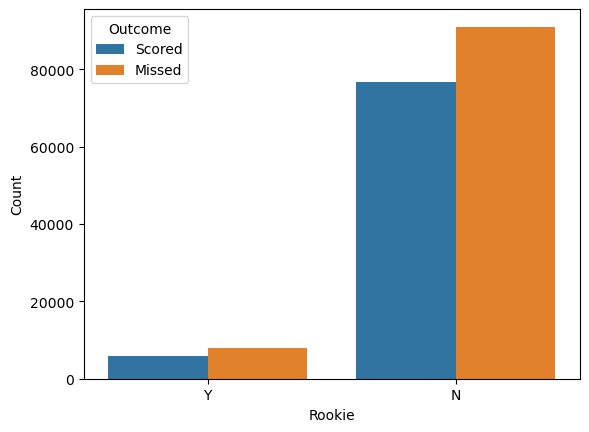

In [34]:
# Rookie = Y and Veteran = N
rookie = df.groupBy("Rookie").agg(F.count(F.when(df["current shot outcome"] == "SCORED", 1)).alias("Scored"),
                                  F.count(F.when(df["current shot outcome"] == "MISSED", 1)).alias("Missed")).toPandas()

rookie_melted = rookie.melt(id_vars=["Rookie"], value_vars=["Scored", "Missed"], var_name="Outcome", value_name="Count")

sns.barplot(x="Rookie", y="Count", hue="Outcome", data=rookie_melted)


In [35]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

category_columns = ["player position", "Rookie"]
indexers = [StringIndexer(inputCol=column, outputCol=column + "_index") for column in category_columns]

for indexer in indexers:
    df = indexer.fit(df).transform(df)

encoders = OneHotEncoder(inputCol="player position_index", outputCol="player position_encoded")

df = encoders.fit(df).transform(df).drop("player position", "Rookie", "player position_index")

# df.show()

<Axes: >

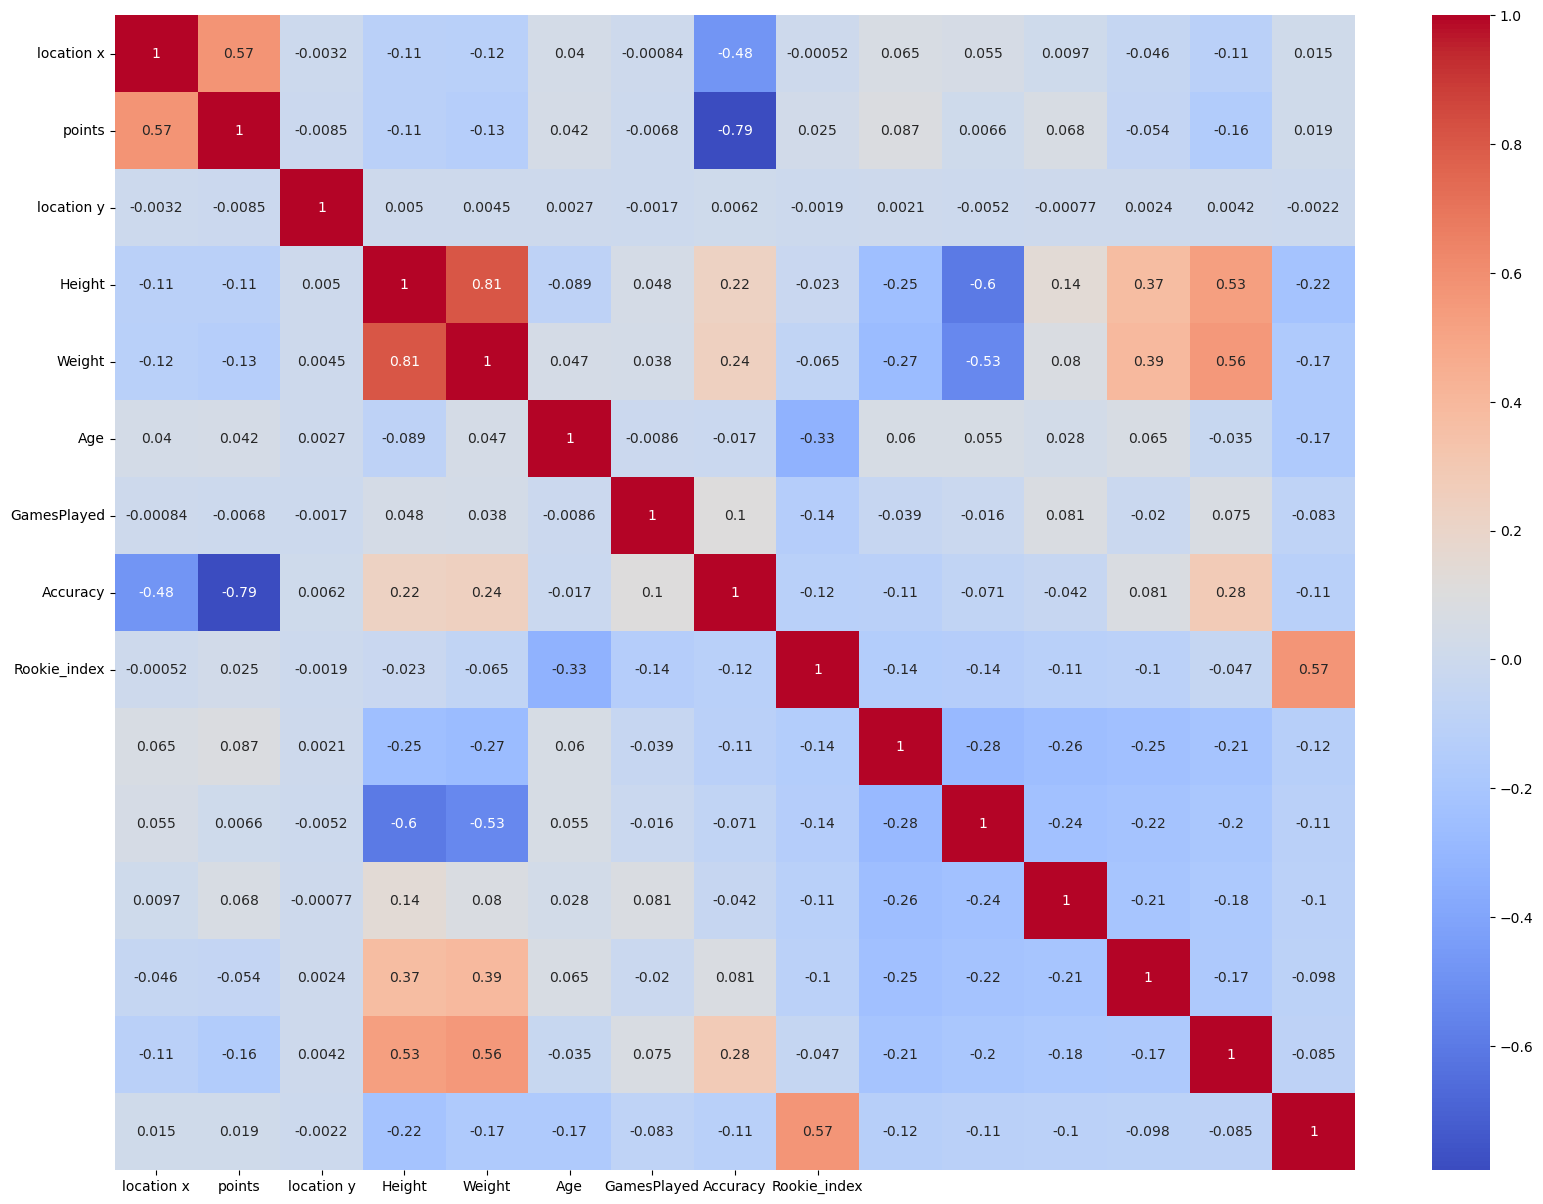

In [36]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

column_names = df.columns
column_names.remove("current shot outcome")

assembler = VectorAssembler(inputCols=column_names, outputCol="features")
matrix = Correlation.corr(assembler.transform(df), "features").head()[0].toArray()

fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(matrix, annot=True, xticklabels=column_names[:-1], yticklabels=column_names[:-1], ax=ax, cmap="coolwarm")

In [37]:
df.show()

+----------+------+----------+--------------------+------------------+------+---+-----------+-------------------+------------+-----------------------+
|location x|points|location y|current shot outcome|            Height|Weight|Age|GamesPlayed|           Accuracy|Rookie_index|player position_encoded|
+----------+------+----------+--------------------+------------------+------+---+-----------+-------------------+------------+-----------------------+
|        54|     2|       248|              MISSED|            210.82|   279| 23|         82|  0.532150776053215|         0.0|          (6,[4],[1.0])|
|        90|     2|        82|              SCORED|            208.28|   228| 28|         78| 0.5458333333333333|         0.0|          (6,[3],[1.0])|
|        70|     2|        46|              MISSED|            205.74|   235| 27|         82|0.46615384615384614|         0.0|          (6,[2],[1.0])|
|        58|     2|       413|              SCORED|            205.74|   235| 27|         82|0

# split data into training and testing

In [38]:
column_names = [col for col in column_names if
                col not in ["player position_encoded", "Rookie_index", "Accuracy", "points"]]
assembler = VectorAssembler(inputCols=column_names, outputCol="feature_noScaling")
df = assembler.transform(df)

train, test = df.randomSplit([0.8, 0.2])

In [39]:
train.show()

+----------+------+----------+--------------------+------------------+------+---+-----------+-------------------+------------+-----------------------+--------------------+
|location x|points|location y|current shot outcome|            Height|Weight|Age|GamesPlayed|           Accuracy|Rookie_index|player position_encoded|   feature_noScaling|
+----------+------+----------+--------------------+------------------+------+---+-----------+-------------------+------------+-----------------------+--------------------+
|         8|     2|       356|              SCORED|            198.12|   206| 20|         82| 0.4478048780487805|         0.0|          (6,[0],[1.0])|[8.0,356.0,198.12...|
|        10|     2|       454|              MISSED|            205.74|   227| 26|         80|  0.547752808988764|         0.0|          (6,[3],[1.0])|[10.0,454.0,205.7...|
|        10|     2|       467|              MISSED|             190.5|   175| 26|         82| 0.5555555555555556|         0.0|          (6,[

# normalize data

In [40]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="feature_noScaling", outputCol="scaled_features")
scaler_model = scaler.fit(train)
train = scaler_model.transform(train)
test = scaler_model.transform(test)

In [41]:
assembler = VectorAssembler(
    inputCols=["scaled_features", "player position_encoded", "Rookie_index", "Accuracy", "points"],
    outputCol="features")
train = assembler.transform(train).select("features", "current shot outcome")
test = assembler.transform(test).select("features", "current shot outcome")

## Model Building

In [42]:
train = train.withColumn("current shot outcome", F.when(df["current shot outcome"] == "SCORED", 1).otherwise(0))
test = test.withColumn("current shot outcome", F.when(df["current shot outcome"] == "SCORED", 1).otherwise(0))

In [43]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol="features", labelCol="current shot outcome")
lr_model = lr.fit(train)

train_predictions = lr_model.transform(train)
test_predictions = lr_model.transform(test)

train_predictions.show()

+--------------------+--------------------+--------------------+--------------------+----------+
|            features|current shot outcome|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+--------------------+----------+
|[0.08824217145707...|                   1|[-0.1215262917228...|[0.46965576313833...|       1.0|
|[0.11030271432134...|                   0|[-0.4238510460451...|[0.39559559687569...|       1.0|
|[0.11030271432134...|                   0|[-0.5529523972223...|[0.36517970192389...|       1.0|
|[0.11030271432134...|                   0|[-0.0864758603169...|[0.47839449720613...|       1.0|
|[0.14339352861774...|                   0|[-0.2975036650225...|[0.42616784613122...|       1.0|
|[0.14339352861774...|                   1|[-0.5815878425229...|[0.35856731301848...|       1.0|
|[0.14339352861774...|                   1|[-0.2969510781559...|[0.42630298610367...|       1.0|
|[0.14339352861774...|        

In [44]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="current shot outcome")
train_auc = evaluator.evaluate(train_predictions)

print("Train AUC: ", train_auc)

test_auc = evaluator.evaluate(test_predictions)
print("Test AUC: ", test_auc)

Train AUC:  0.6114832915489453
Test AUC:  0.608799364396235


In [45]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol="features", labelCol="current shot outcome")
rf_model = rf.fit(train)

train_predictions = rf_model.transform(train)
test_predictions = rf_model.transform(test)

train_predictions.show()

+--------------------+--------------------+--------------------+--------------------+----------+
|            features|current shot outcome|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+--------------------+----------+
|[0.08824217145707...|                   1|[9.32209748848254...|[0.46610487442412...|       1.0|
|[0.11030271432134...|                   0|[9.18955568174200...|[0.45947778408710...|       1.0|
|[0.11030271432134...|                   0|[9.36604171876758...|[0.46830208593837...|       1.0|
|[0.11030271432134...|                   0|[12.0231929336882...|[0.60115964668441...|       0.0|
|[0.14339352861774...|                   0|[10.3425603417982...|[0.51712801708991...|       0.0|
|[0.14339352861774...|                   1|[10.4301726255423...|[0.52150863127711...|       0.0|
|[0.14339352861774...|                   1|[9.32981956827844...|[0.46649097841392...|       1.0|
|[0.14339352861774...|        

In [46]:
train_auc = evaluator.evaluate(train_predictions)

print("Train AUC: ", train_auc)

test_auc = evaluator.evaluate(test_predictions)
print("Test AUC: ", test_auc)

Train AUC:  0.623639228612883
Test AUC:  0.6190504299223119
